Basic python for data analysis

# Section

what we would to do:
- thing 1
- thing 2

$\alpha(t) = \int_{-\infty}^0\xi(\zeta)d\zeta$

In [25]:
from numpy import *
# import cPickle as cp
from collections import Counter
import matplotlib
from matplotlib.pyplot import *
%matplotlib inline
import re
import string
from collections import Counter
# import networkx as nx
from pandas import *
import scipy

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
import seaborn as sns

%config InlineBackend.figure_formats = {'png', 'retina'}
# rc = {'lines.linewidth': 2, 
#       'axes.labelsize': 24, 
#       'axes.titlesize': 24,
# #       'axes.xtick.labelsize': 20,
# #       'axes.ytick.labelsize': 20,
#       'axes.facecolor': 'None'}
# #       'axes.facecolor': 'DFDFE5'}
  
# sns.set_context('notebook', rc=rc)
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5,'axes.labelsize': 24})
# # sns.set(style='white', rc = rc)
# sns.set_style('ticks', rc = rc)
# # sns.set_style('white', rc=rc)

# # sns.set_style('darkgrid', rc=rc)
# # sns.set_style('darkgrid', rc=rc)

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 26, 
      'axes.titlesize': 26,
      'axes.xtick.labelsize': 22,
      'axes.ytick.labelsize': 22,
      'axes.facecolor': 'None'}
#       'axes.facecolor': 'DFDFE5'}
  
sns.set_context('notebook', rc = rc)
sns.set_context("paper", font_scale = 2.5)
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5,'axes.labelsize': 24})
# sns.set(style='white', rc = rc)
sns.set_style('ticks', rc = rc)
# import matplotlib.ticker as plticker
# from mpl_toolkits.axes_grid1 import make_axes_locatable







In [31]:
x = [1,2,3,6,83,90]
y = [25,45,35,67,30,30]

In [27]:
x[2]

3

In [32]:
print(x,y)

([1, 2, 3, 6, 83, 90], [25, 45, 35, 67, 30, 30])


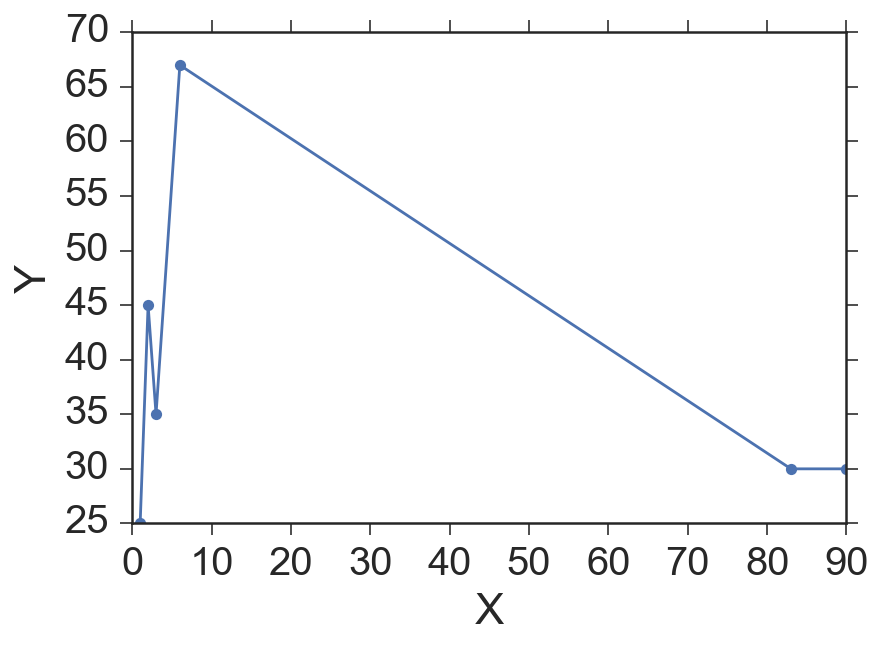

In [36]:
plot(x,y, '-o')
xlabel('X')
ylabel('Y')

# Tuples

In [37]:
t = (23,45,45)

In [38]:
t[0]

23

# Dictionaries

In [12]:
d = {'Hens' : 5, 'Chicken' : 7, 6 : 56}

In [13]:
print(d['Hens'])
print(d['Chicken'])
print(d[6])

5
7
56


In [39]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = DataFrame(data)

frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [41]:
print(frame[frame['year'] == 2001])
print(frame[frame['state'] == 'Nevada'])
frame[frame['pop'] == 1.7]

   pop   state  year
1  1.7    Ohio  2001
3  2.4  Nevada  2001
   pop   state  year
3  2.4  Nevada  2001
4  2.9  Nevada  2002


,pop,state,year
1,1.7,Ohio,2001


In [42]:
frame.to_csv('frame.csv', sep=';')

In [43]:
frame2 = read_csv('frame.csv', sep = ';')

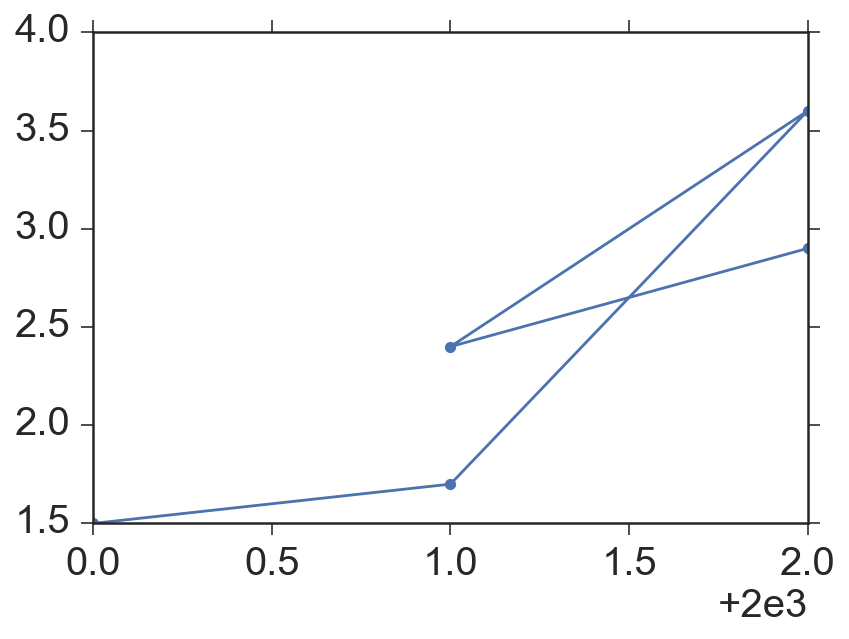

In [44]:
plot(frame['year'], frame['pop'],'-o')

# Basic epidemics with python

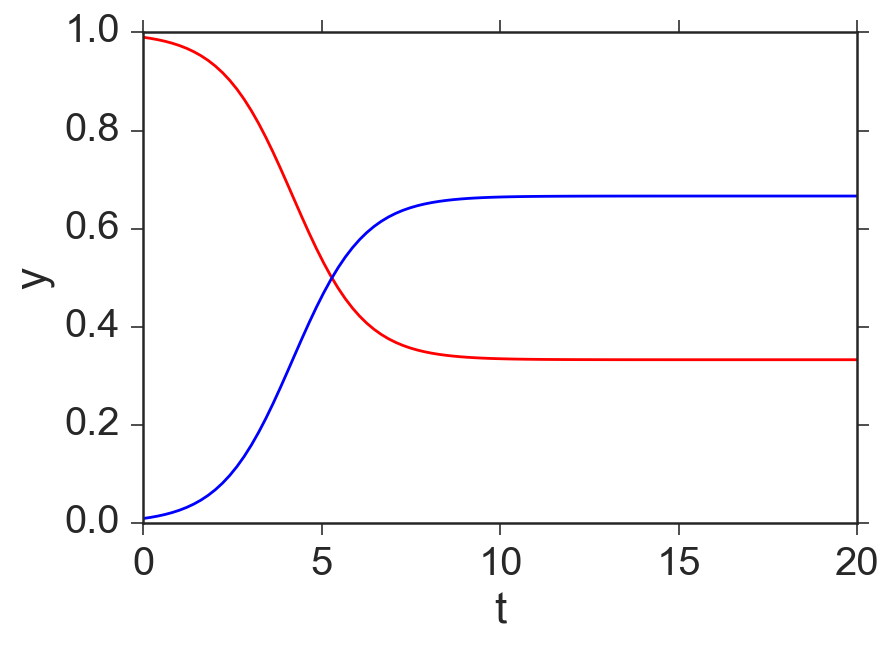

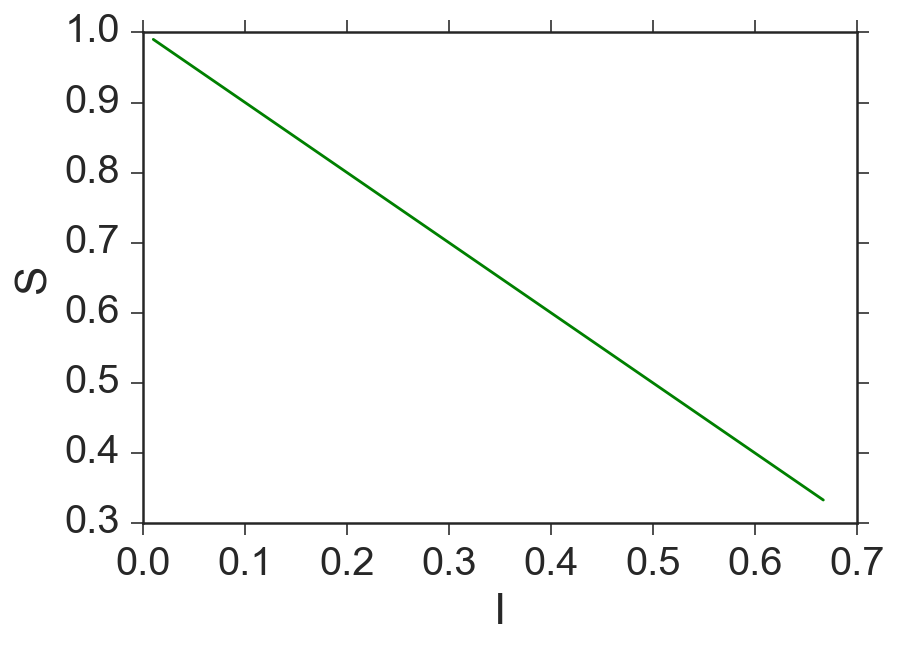

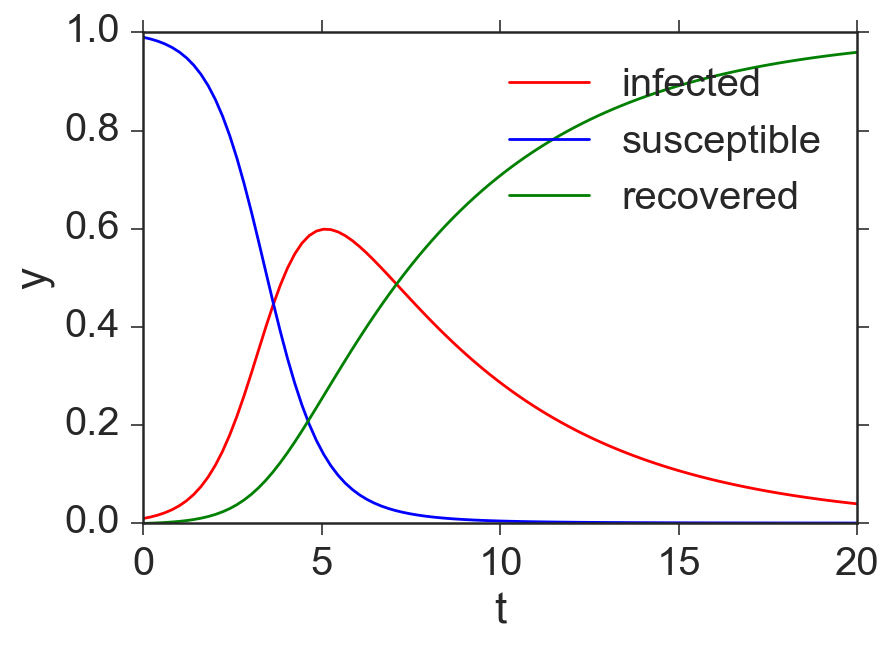

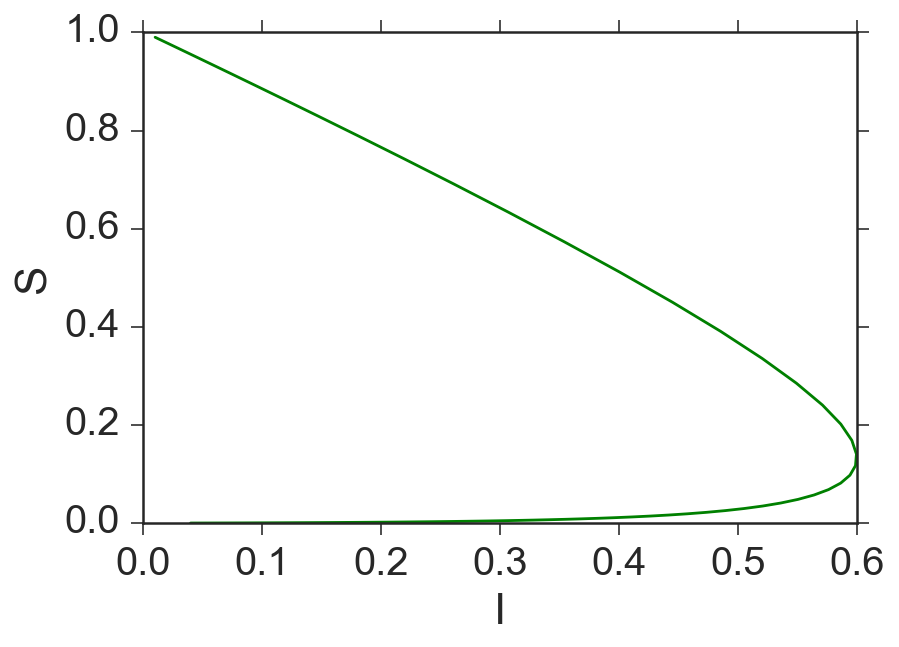

In [45]:
from scipy.integrate import odeint

a = 1.5
b = 0.5

def deriv(y,t,a,b): 

    return array([ a*y[0]*y[1] - b*y[0], -a*y[0]*y[1] + b*y[0] ])



time = linspace(0.0,20.0,100)
yinit = array([0.01,0.99])  # initial values

args = (a,b)
y = odeint(deriv, yinit, time, args)


plot(time,y[:,1],'r-') 
plot(time,y[:,0],'b-') 
xlabel('t')
ylabel('y')

figure()

plot(y[:,0], y[:,1],'g-') 
xlabel('I')
ylabel('S')


figure()

from scipy.integrate import odeint

a = 1.5
b = 0.2

#print "R_0 =", a/b
#def deriv(y,t,a,b): 
def deriv(y,t): 
    #a = -1.0
    #b = 0.5
    return array([ a*y[0]*y[1] - b*y[0], -a*y[0]*y[1], b*y[0] ])



time = linspace(0.0, 20.0, 100)
yinit = array([0.01, 0.99, 0])  # initial values

args = (a,b)
#y = odeint(deriv, yinit, time, args)
y = odeint(deriv, yinit, time)

plot(time,y[:,0],'r-', label = 'infected') 
plot(time,y[:,1],'b-', label = 'susceptible')
plot(time,y[:,2],'g-', label = 'recovered')
legend()
xlabel('t')
ylabel('y')

figure()

plot(y[:,0], y[:,1],'g-') 
xlabel('I')
ylabel('S')





# Networks

(-1.0, 1.0, -1.5, 1.5)

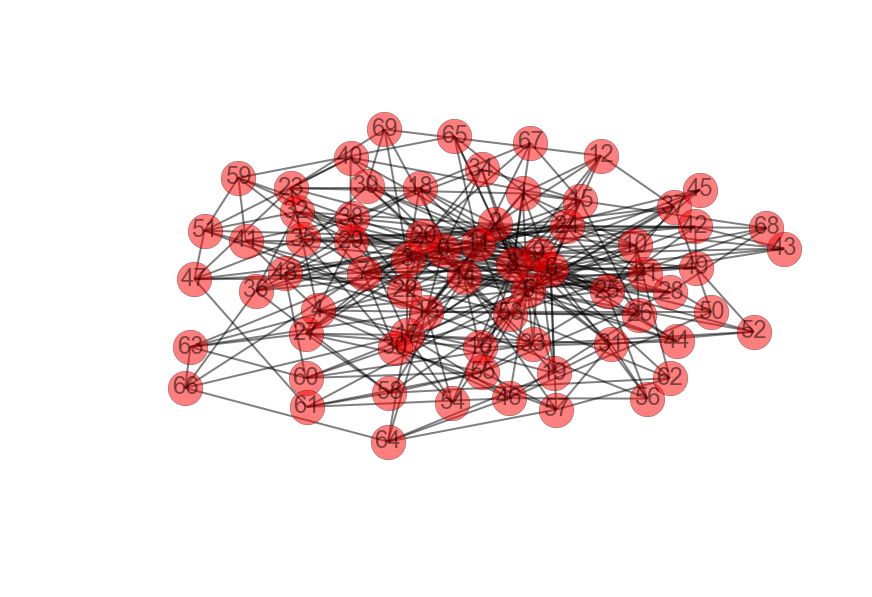

In [24]:
import community
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cmx

#erdos renyi don't have true community structure
#G = nx.erdos_renyi_graph(60, 0.09)
G = nx.barabasi_albert_graph(70,5)
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos, alpha=0.5)
axis('off')
